In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(30)
np.random.seed(30)

# Dataset Preparation

In [2]:
df = pd.read_excel('Simulation_Data.xlsx')
x = df[['Volume1', 'Volume2', 'Speed1', 'Speed2']]
y = df[['Volume3', 'Speed3']]
x_train = x.loc[:671]
y_train = y.loc[:671]
x_test = x.loc[671:]
y_test = y.loc[671:]
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.15, shuffle=False)

# Modeling

In [3]:
def train(hidden_layer_sizes, x_val, y_val, model=None):
    if model is None:
        model = MLPRegressor(hidden_layer_sizes, random_state=42)
        model.fit(x_train, y_train)
    y_predict_val = model.predict(x_val)

    print(f'mean_squared_error: {mean_squared_error(y_val, y_predict_val)}')
    print(f'mean_absolute_error: {mean_absolute_error(y_val, y_predict_val)}')

    # Scatter Plot
    plt.figure(0)
    X = y_val['Volume3'].tolist()
    Y = y_predict_val[:,0]
    plt.xlabel("Ground Truth of Volume3")
    plt.ylabel("Prediction of Volume3")
    plt.plot(X, Y, 'o')
    m, b = np.polyfit(X, Y, 1)
    plt.plot(X, m*np.array(X) + b)

    # Time Plot
    plt.figure(2)
    y = [X, list(Y)]
    x = list(range(len(y[1])))
    plt.xlabel("Hour")
    plt.ylabel("Volume3")
    plt.title("Visual Comparison")
    for i in range(len(y)):
        plt.plot(x,[pt for pt in y[i]],label = 'Ground Truth' if i==0 else 'Prediction')
    plt.legend()
    plt.show()

    plt.figure(1)
    X = y_val['Speed3'].tolist()
    Y = y_predict_val[:,1]
    plt.xlabel("Ground Truth of Speed3")
    plt.ylabel("Prediction of Speed3")
    plt.plot(X, Y, 'o')
    m, b = np.polyfit(X, Y, 1)
    plt.plot(X, m*np.array(X) + b)

    # TIme Plot
    plt.figure(3)
    y = [X, list(Y)]
    x = list(range(len(y[1])))
    plt.xlabel("Hour")
    plt.ylabel("Speed3")
    plt.title("Visual Comparison")
    for i in range(len(y)):
        plt.plot(x,[pt for pt in y[i]],label = 'Ground Truth' if i==0 else 'Prediction')
    plt.legend()
    plt.show()
    
    return model

mean_squared_error: 461151.3373544969
mean_absolute_error: 391.19283964587476


C:\Users\49176\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


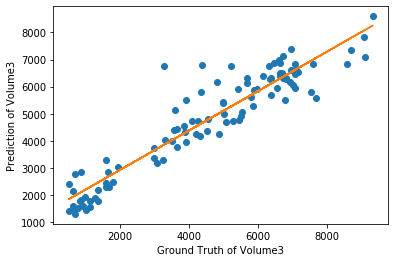

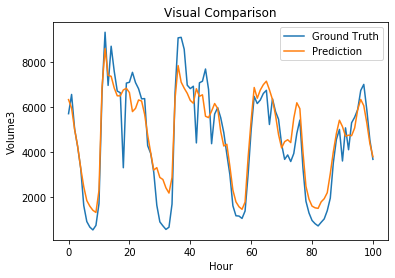

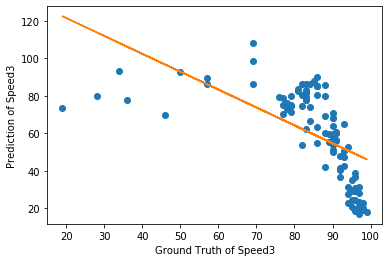

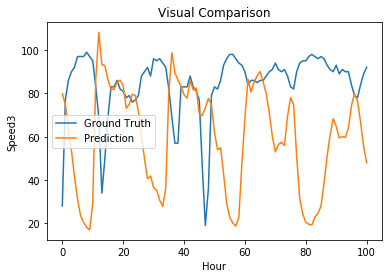

In [4]:
model1 = train([3,2], x_val, y_val)

mean_squared_error: 13139389.500323428
mean_absolute_error: 2298.5530374941445


C:\Users\49176\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


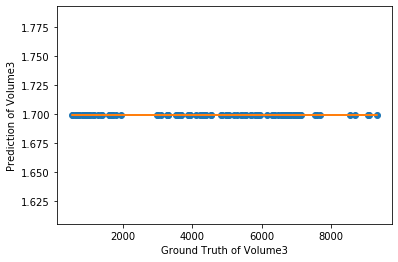

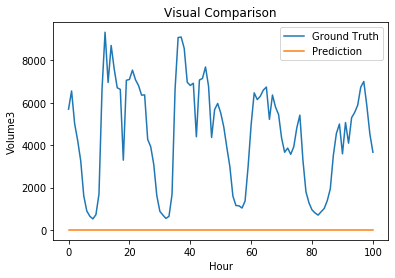

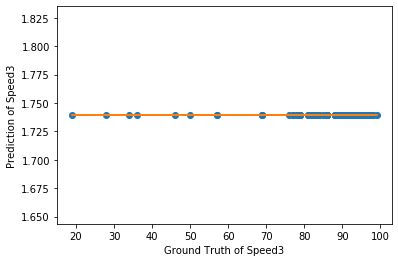

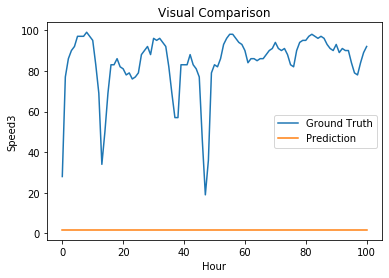

In [5]:
model2 = train([3,2,2], x_val, y_val)

# Model 2 is better according to validation dataset. So we will evaluate test data with this model.

test evaluation
mean_squared_error: 188997.03547142242
mean_absolute_error: 269.56237448733555


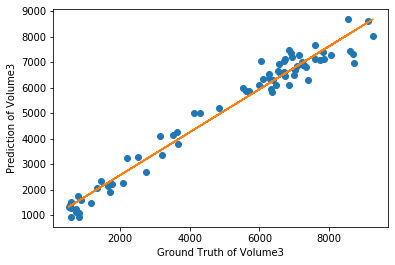

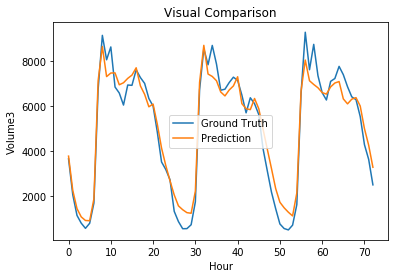

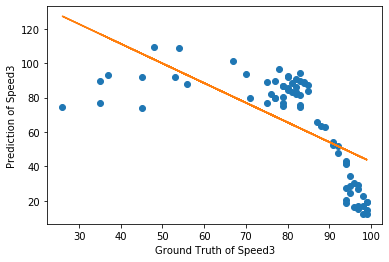

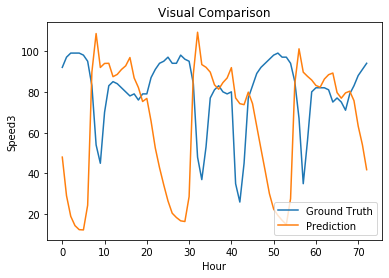

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[3, 2], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [6]:
print('test evaluation')
train(None, x_test, y_test, model1)

In [7]:
def print_network(model):
    for i,a in enumerate(model.coefs_):
        if i==0:
            print(f'Input Layer -> Hidden Layer {i+1}')
        elif i==len(model.coefs_)-1:
            print(f'Hidden Layer{i+1} -> Output Layer')
        else:
            print(f'Hidden Layer{i} -> Hidden Layer{i+1}')
        for b in a:
            print(b)

In [8]:
print_network(model1)

Input Layer -> Hidden Layer 1
[-0.27843605  1.25526399  1.01841119]
[ 0.00413162 -0.1384518   0.03802917]
[-0.89140245  1.02408573  0.76445874]
[ 0.17243351 -0.5421696   1.45449863]
Hidden Layer1 -> Hidden Layer2
[-0.25359911 -0.23194096]
[-0.0010041   0.52690642]
[-0.49018919  0.91745758]
Hidden Layer3 -> Output Layer
[-0.28787245 -0.06925949]
[1.41843222 0.01772829]


In [9]:
print_network(model2)

Input Layer -> Hidden Layer 1
[-0.26987652  0.95684929  0.38181251]
[ 0.13918143 -0.50453561 -0.68464981]
[-0.85131464  0.78162837  0.13765078]
[ 0.34925918 -0.78447315  0.82103733]
Hidden Layer1 -> Hidden Layer2
[-0.65025317 -0.07525295]
[ 0.11689809 -0.17699914]
[-0.41113829  0.2143367 ]
Hidden Layer2 -> Hidden Layer3
[-0.33656625 -0.17139942]
[ 0.67056214 -0.7492852 ]
Hidden Layer4 -> Output Layer
[-1.0782906   0.29417399]
[-0.66292387 -0.92225281]
